## Aaditya Deshmukh (Loan Prediction)

- IMS Proschool Pune.
- LinkedIn ID- https://www.linkedin.com/in/aaditya-deshmukh-50174a1a3
- Github URL - https://github.com/Aaditya28-D/Projects-2020

### Loading All required packages

In [174]:
import pandas as pd
import numpy as np
import os as os

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency 
import math as math

import warnings as warnings 
warnings.filterwarnings('ignore')

In [175]:
train=pd.read_csv(r'C:\Users\Aaditya Deshmukh\Desktop\IMS\1. PGD Data Science\1. Bussiness Analytics\7. Logistic Regression\3. LVC\Loan Prediction Problem\Orignal CSV file\train_ctrUa4K.csv')
test=pd.read_csv(r'C:\Users\Aaditya Deshmukh\Desktop\IMS\1. PGD Data Science\1. Bussiness Analytics\7. Logistic Regression\3. LVC\Loan Prediction Problem\Orignal CSV file\test_lAUu6dG.csv')

In [176]:
data=train.append(test)

In [177]:
data.shape

(981, 13)

In [178]:
data.nunique()

Loan_ID              981
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           232
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [179]:
data_1=data.copy()
data_1.drop(['Loan_ID'], axis=1,inplace=True)
data_1.shape

(981, 12)

In [180]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            978 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


In [181]:
data_1.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [182]:
col_1=data_1.loc[:, data_1.isna().any()].select_dtypes(include=['object']).drop('Loan_Status', axis=1).columns.tolist()

for i in col_1:
    data_1[i].fillna(data_1[i].mode()[0], inplace=True)
    data_1[i]=data_1[i].astype('object')

In [183]:
data_1['Loan_Amount_Term'].mode()[0]

360.0

In [184]:
data_1['Loan_Amount_Term'].fillna(360.0, inplace=True)

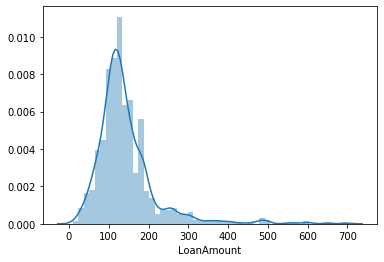

In [185]:
sns.distplot(data_1['LoanAmount'])

In [186]:
data_1['LoanAmount'].fillna(126.0,  inplace=True)

In [187]:
col=data_1.columns[data_1.nunique()<13].tolist()

for i in col:
    data_1[i]=data_1[i].astype('object')

col1=data_1.columns[data_1.nunique()>13].tolist()

for i in col1:
    data_1[i]=data_1[i].astype('float64')

In [188]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         981 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      981 non-null    object 
 5   ApplicantIncome    981 non-null    float64
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    object 
 9   Credit_History     902 non-null    object 
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), object(9)
memory usage: 99.6+ KB


In [189]:
data_1['log_ApplicantIncome']=np.log(data_1['ApplicantIncome']+1)
data_1['log_CoapplicantIncome']=np.log(data_1['CoapplicantIncome']+1)
data_1['log_LoanAmount']=np.log(data_1['LoanAmount']+1)

log_ApplicantIncome - ( upper limit = 9.59 , lower limit =  6.99 )
right =  39
left= 12
log_CoapplicantIncome - ( upper limit = 19.42 , lower limit =  -11.65 )
right =  0
left= 0
log_LoanAmount - ( upper limit = 5.77 , lower limit =  3.94 )
right =  30
left= 35


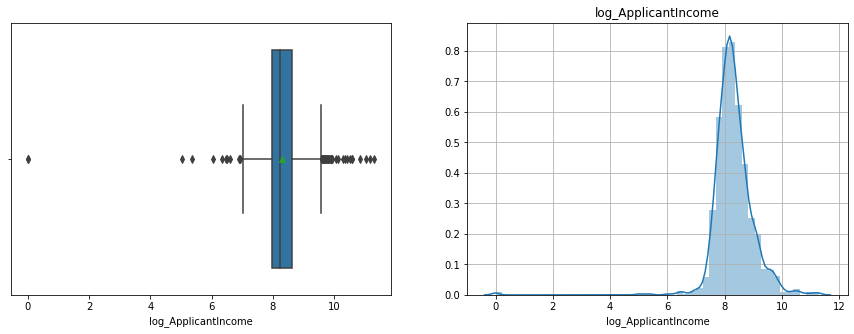

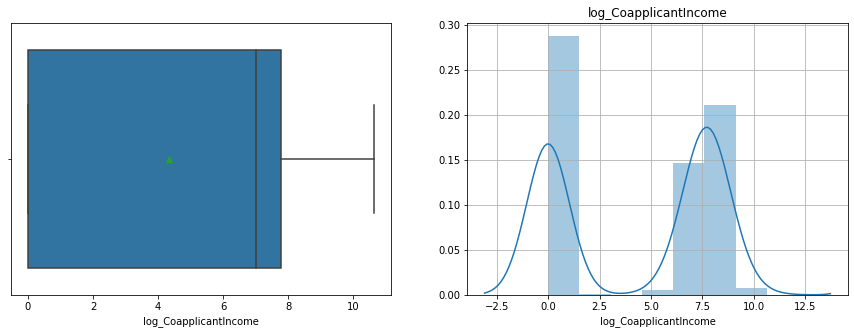

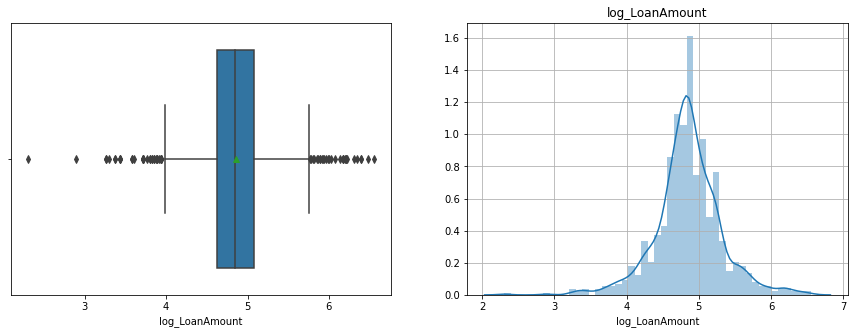

In [190]:
col=['log_ApplicantIncome', 'log_CoapplicantIncome', 'log_LoanAmount']

for k in col:
        Q3=np.percentile(data_1[k], 75)
        Q1=np.percentile(data_1[k], 25)
        ul=Q3+1.5*(Q3-Q1)
        ll=Q1-1.5*(Q3-Q1)
        print(k,'- ( upper limit =', round(ul,2), ',' , 'lower limit = ', round(ll, 2), ')')
        print('right = ', len(data_1.loc[data_1[k]>ul,:]))
        print('left=', len(data_1.loc[data_1[k]<ll,:]))
        
for n in col:
    fig,axes=plt.subplots(1,2, figsize=(15,5))
    sns.boxplot(data_1[n], ax=axes[0], showmeans=True)
    sns.distplot(data_1[n], ax=axes[1])
    plt.title(n)
    plt.grid()
    plt.show()

In [191]:
data_1.loc[data_1['log_ApplicantIncome']>9.59,'log_ApplicantIncome']=np.median(data_1['log_ApplicantIncome'])
data_1.loc[data_1['log_ApplicantIncome']<6.99,'log_ApplicantIncome']=np.median(data_1['log_ApplicantIncome'])

In [192]:
data_1.loc[data_1['log_CoapplicantIncome']<3,'log_CoapplicantIncome']=np.mean(data_1['log_CoapplicantIncome'])

In [193]:
data_1.loc[data_1['log_LoanAmount']>5.77,'log_LoanAmount']=np.median(data_1['log_LoanAmount'])
data_1.loc[data_1['log_LoanAmount']<3.94,'log_LoanAmount']=np.median(data_1['log_LoanAmount'])

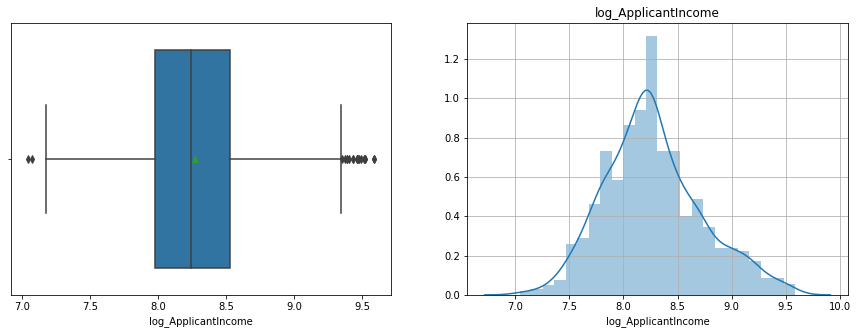

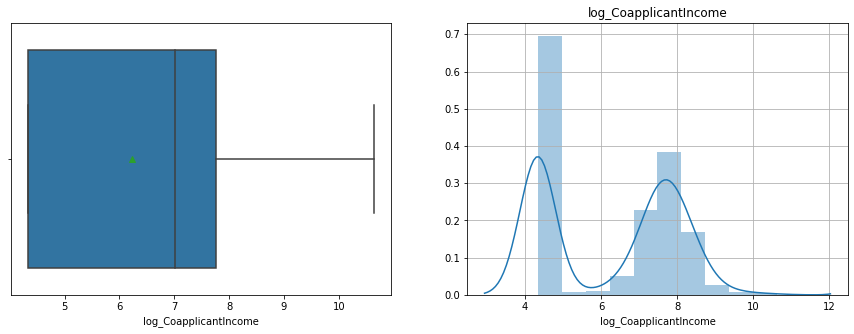

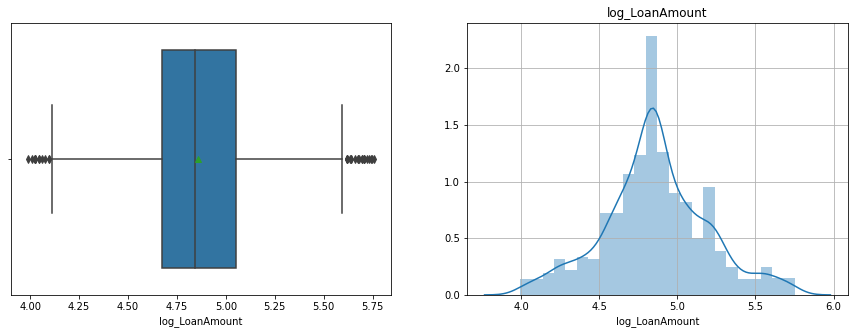

In [194]:
for n in col:
    fig,axes=plt.subplots(1,2, figsize=(15,5))
    sns.boxplot(data_1[n], ax=axes[0], showmeans=True)
    sns.distplot(data_1[n], ax=axes[1])
    plt.title(n)
    plt.grid()
    plt.show()

In [195]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 981 non-null    object 
 1   Married                981 non-null    object 
 2   Dependents             981 non-null    object 
 3   Education              981 non-null    object 
 4   Self_Employed          981 non-null    object 
 5   ApplicantIncome        981 non-null    float64
 6   CoapplicantIncome      981 non-null    float64
 7   LoanAmount             981 non-null    float64
 8   Loan_Amount_Term       981 non-null    object 
 9   Credit_History         902 non-null    object 
 10  Property_Area          981 non-null    object 
 11  Loan_Status            614 non-null    object 
 12  log_ApplicantIncome    981 non-null    float64
 13  log_CoapplicantIncome  981 non-null    float64
 14  log_LoanAmount         981 non-null    float64
dtypes: flo

In [196]:
data_1.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status'], axis=1, inplace=True)

In [197]:
data_2=data_1.copy()

In [198]:
data_1_cat=data_1[data_1.select_dtypes('object').drop('Credit_History', axis=1).columns.tolist()]
data_1_num=data_1[data_1.select_dtypes('float64').columns.tolist()]

In [199]:
data_1_cat_dummies=pd.get_dummies(data_1_cat,drop_first=True)

In [200]:
data_1_cat_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender_Male              981 non-null    uint8
 1   Married_Yes              981 non-null    uint8
 2   Dependents_1             981 non-null    uint8
 3   Dependents_2             981 non-null    uint8
 4   Dependents_3+            981 non-null    uint8
 5   Education_Not Graduate   981 non-null    uint8
 6   Self_Employed_Yes        981 non-null    uint8
 7   Loan_Amount_Term_12.0    981 non-null    uint8
 8   Loan_Amount_Term_36.0    981 non-null    uint8
 9   Loan_Amount_Term_60.0    981 non-null    uint8
 10  Loan_Amount_Term_84.0    981 non-null    uint8
 11  Loan_Amount_Term_120.0   981 non-null    uint8
 12  Loan_Amount_Term_180.0   981 non-null    uint8
 13  Loan_Amount_Term_240.0   981 non-null    uint8
 14  Loan_Amount_Term_300.0   981 non-null    uint8
 15  Loan_A

In [201]:
data_3=pd.concat([data_1_num, data_1_cat_dummies], axis=1)

In [202]:
data_3.isnull().sum()

log_ApplicantIncome        0
log_CoapplicantIncome      0
log_LoanAmount             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Loan_Amount_Term_12.0      0
Loan_Amount_Term_36.0      0
Loan_Amount_Term_60.0      0
Loan_Amount_Term_84.0      0
Loan_Amount_Term_120.0     0
Loan_Amount_Term_180.0     0
Loan_Amount_Term_240.0     0
Loan_Amount_Term_300.0     0
Loan_Amount_Term_350.0     0
Loan_Amount_Term_360.0     0
Loan_Amount_Term_480.0     0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [203]:
data_3['Credit_History']=data_1['Credit_History']

In [204]:
data_3.isnull().sum()

log_ApplicantIncome         0
log_CoapplicantIncome       0
log_LoanAmount              0
Gender_Male                 0
Married_Yes                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Not Graduate      0
Self_Employed_Yes           0
Loan_Amount_Term_12.0       0
Loan_Amount_Term_36.0       0
Loan_Amount_Term_60.0       0
Loan_Amount_Term_84.0       0
Loan_Amount_Term_120.0      0
Loan_Amount_Term_180.0      0
Loan_Amount_Term_240.0      0
Loan_Amount_Term_300.0      0
Loan_Amount_Term_350.0      0
Loan_Amount_Term_360.0      0
Loan_Amount_Term_480.0      0
Property_Area_Semiurban     0
Property_Area_Urban         0
Credit_History             79
dtype: int64

In [205]:
hist_train=data_3.loc[data_3['Credit_History'].notnull(),:]
hist_test=data_3.loc[data_3['Credit_History'].isnull(),:]

In [206]:
hist_train_cat_dummies=pd.get_dummies(hist_train[['Credit_History']], drop_first=True)

In [207]:
hist_train_num=hist_train.drop('Credit_History', axis=1)

In [208]:
hist_train=pd.concat([hist_train_num, hist_train_cat_dummies], axis=1)

In [209]:
hist_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   log_ApplicantIncome      902 non-null    float64
 1   log_CoapplicantIncome    902 non-null    float64
 2   log_LoanAmount           902 non-null    float64
 3   Gender_Male              902 non-null    uint8  
 4   Married_Yes              902 non-null    uint8  
 5   Dependents_1             902 non-null    uint8  
 6   Dependents_2             902 non-null    uint8  
 7   Dependents_3+            902 non-null    uint8  
 8   Education_Not Graduate   902 non-null    uint8  
 9   Self_Employed_Yes        902 non-null    uint8  
 10  Loan_Amount_Term_12.0    902 non-null    uint8  
 11  Loan_Amount_Term_36.0    902 non-null    uint8  
 12  Loan_Amount_Term_60.0    902 non-null    uint8  
 13  Loan_Amount_Term_84.0    902 non-null    uint8  
 14  Loan_Amount_Term_120.0   9

In [210]:
x=hist_train.drop(['Credit_History_1.0'], axis=1)
y=hist_train[['Credit_History_1.0']]

x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.8, random_state=100)

rc=RandomForestClassifier(n_estimators=1000, random_state=100)
rc.fit(x_train, y_train)
y=rc.feature_importances_

In [211]:
feature_importance={'feature_name':hist_train.drop(['Credit_History_1.0'], axis=1).columns.tolist(), 'feature_importance':y}

feature_imp_table_2=pd.DataFrame(feature_importance)
feature_imp_table_2['feature_importance']=feature_imp_table_2['feature_importance']*100
feature_imp_table_2.sort_values(['feature_importance'], ascending=False, inplace=True)
feature_imp_table_2

,feature_name,feature_importance
0,log_ApplicantIncome,29.020028
2,log_LoanAmount,25.805278
1,log_CoapplicantIncome,16.868501
8,Education_Not Graduate,3.380267
3,Gender_Male,2.983172
4,Married_Yes,2.937215
22,Property_Area_Urban,2.864520
21,Property_Area_Semiurban,2.852685
6,Dependents_2,2.433522
5,Dependents_1,2.055202


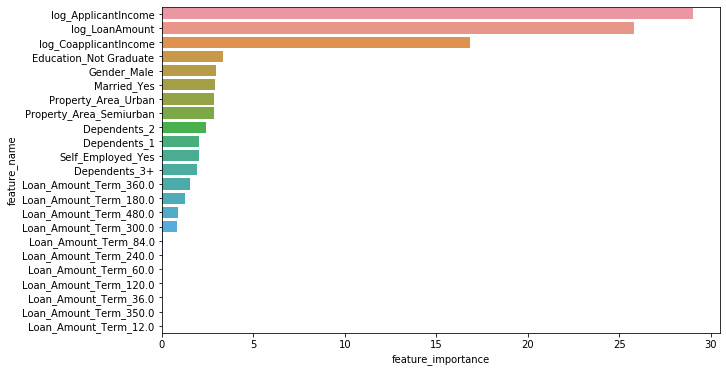

In [212]:
axes=plt.subplots(figsize=(10,6))
sns.barplot(x='feature_importance', y='feature_name', data=feature_imp_table_2)

In [213]:
col_1=['log_ApplicantIncome','log_LoanAmount','log_CoapplicantIncome']
col_2=['log_ApplicantIncome','log_LoanAmount','log_CoapplicantIncome', 'Education_Not Graduate',]
col_3=['log_ApplicantIncome','log_LoanAmount','log_CoapplicantIncome', 'Education_Not Graduate', 'Gender_Male']
col_4=['log_ApplicantIncome','log_LoanAmount','log_CoapplicantIncome', 'Education_Not Graduate', 'Gender_Male','Married_Yes']
col_5=['log_ApplicantIncome','log_LoanAmount','log_CoapplicantIncome', 'Education_Not Graduate', 'Gender_Male', 'Married_Yes', 'Property_Area_Semiurban']
col_6=['log_ApplicantIncome','log_LoanAmount','log_CoapplicantIncome', 'Education_Not Graduate', 'Gender_Male', 'Married_Yes', 'Property_Area_Semiurban', 'Dependents_2']
col_7=['log_ApplicantIncome','log_LoanAmount','log_CoapplicantIncome', 'Education_Not Graduate', 'Gender_Male', 'Married_Yes', 'Property_Area_Semiurban', 'Dependents_2', 'Dependents_1']
col_8=['log_ApplicantIncome','log_LoanAmount','log_CoapplicantIncome', 'Education_Not Graduate', 'Gender_Male', 'Married_Yes', 'Property_Area_Semiurban', 'Dependents_2', 'Dependents_1','Self_Employed_Yes']
col_9=['log_ApplicantIncome','log_LoanAmount','log_CoapplicantIncome', 'Education_Not Graduate', 'Gender_Male', 'Married_Yes', 'Property_Area_Semiurban', 'Dependents_2', 'Dependents_1','Self_Employed_Yes', 'Dependents_3+']
col_10=['log_ApplicantIncome','log_LoanAmount','log_CoapplicantIncome', 'Education_Not Graduate', 'Gender_Male', 'Married_Yes', 'Property_Area_Semiurban', 'Dependents_2', 'Dependents_1','Self_Employed_Yes', 'Dependents_3+', 'Loan_Amount_Term_360.0']

x_col=[col_1, col_2, col_3, col_4, col_5, col_6, col_7, col_8, col_9,col_10]

In [214]:
#train =  0.835 , test =  0.8398

In [215]:
#7 col_8, train =  0.8433 , test =  0.8453

In [216]:
#1 train =  0.8336 , test =  0.8393
#2 train =  0.841 , test =  0.8255

In [217]:
x_train=hist_train[col_8]
y_train=hist_train[['Credit_History_1.0']]
lr=LogisticRegression()
lr.fit(x_train, y_train)
print('train = ', round(lr.score(x_train, y_train), 4))

train =  0.8359


In [218]:
x_test=hist_test[col_8]

In [219]:
lr.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [220]:
x_train=hist_train[col_8]
y_train=hist_train[['Credit_History_1.0']]
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
print('Accuracy score')
print('train = ', round(knn.score(x_train, y_train), 4))

Accuracy score
train =  0.8404


In [221]:
x_test=hist_test[col_8]

In [222]:
knn.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [223]:
x_train=hist_train[col_8]
y_train=hist_train[['Credit_History_1.0']]
dc1=DecisionTreeClassifier(max_depth=1)
dc1.fit(x_train, y_train)
print('Accuracy score')
print('train = ', round(dc1.score(x_train, y_train), 4))

Accuracy score
train =  0.8359


In [224]:
x_test=hist_test[col_8]

In [225]:
dc1.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [226]:
x_train=hist_train[col_8]
y_train=hist_train[['Credit_History_1.0']]
dc2=DecisionTreeClassifier(max_depth=2)
dc2.fit(x_train, y_train)
print('Accuracy score')
print('train = ', round(dc2.score(x_train, y_train), 4))

Accuracy score
train =  0.837


In [227]:
x_test=hist_test[col_8]

In [228]:
dc2.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [229]:
hist_pred=pd.DataFrame()
hist_pred['pred_1']=lr.predict(x_test)
hist_pred['pred_2']=knn.predict(x_test)
hist_pred['pred_3']=dc1.predict(x_test)
hist_pred['pred_4']=dc2.predict(x_test)

In [230]:
hist_pred

,pred_1,pred_2,pred_3,pred_4
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
74,1,1,1,1
75,1,1,1,1
76,1,1,1,1
77,1,1,1,1


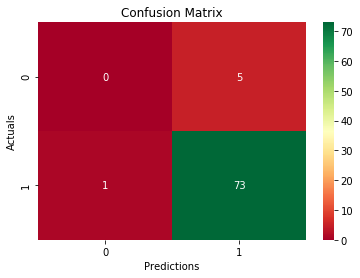

In [231]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(hist_pred['pred_2'], hist_pred['pred_4'])
sns.heatmap(con_matrix, annot=True, cmap='RdYlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [232]:
hist_test['Credit_History_1.0']=knn.predict(x_test)

In [233]:
hist_test['Loan_ID']=data.loc[data['Credit_History'].isnull(),['Loan_ID']]

In [234]:
hist_test.drop('Credit_History', axis=1, inplace=True)

In [235]:
hist_train['Loan_ID']=data.loc[data['Credit_History'].notnull(),['Loan_ID']]

In [236]:
hist_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 366
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   log_ApplicantIncome      902 non-null    float64
 1   log_CoapplicantIncome    902 non-null    float64
 2   log_LoanAmount           902 non-null    float64
 3   Gender_Male              902 non-null    uint8  
 4   Married_Yes              902 non-null    uint8  
 5   Dependents_1             902 non-null    uint8  
 6   Dependents_2             902 non-null    uint8  
 7   Dependents_3+            902 non-null    uint8  
 8   Education_Not Graduate   902 non-null    uint8  
 9   Self_Employed_Yes        902 non-null    uint8  
 10  Loan_Amount_Term_12.0    902 non-null    uint8  
 11  Loan_Amount_Term_36.0    902 non-null    uint8  
 12  Loan_Amount_Term_60.0    902 non-null    uint8  
 13  Loan_Amount_Term_84.0    902 non-null    uint8  
 14  Loan_Amount_Term_120.0   9

In [237]:
hist_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 16 to 364
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   log_ApplicantIncome      79 non-null     float64
 1   log_CoapplicantIncome    79 non-null     float64
 2   log_LoanAmount           79 non-null     float64
 3   Gender_Male              79 non-null     uint8  
 4   Married_Yes              79 non-null     uint8  
 5   Dependents_1             79 non-null     uint8  
 6   Dependents_2             79 non-null     uint8  
 7   Dependents_3+            79 non-null     uint8  
 8   Education_Not Graduate   79 non-null     uint8  
 9   Self_Employed_Yes        79 non-null     uint8  
 10  Loan_Amount_Term_12.0    79 non-null     uint8  
 11  Loan_Amount_Term_36.0    79 non-null     uint8  
 12  Loan_Amount_Term_60.0    79 non-null     uint8  
 13  Loan_Amount_Term_84.0    79 non-null     uint8  
 14  Loan_Amount_Term_120.0   7

In [238]:
data_4=pd.concat([hist_train, hist_test], axis=0,ignore_index=True).sort_values(['Loan_ID'], ascending=True, ignore_index=True)

In [242]:
data_4

,log_ApplicantIncome,log_CoapplicantIncome,log_LoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,...,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_350.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0,Loan_ID
0,8.674197,4.333883,4.844187,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,LP001002
1,8.430327,7.319202,4.859812,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,LP001003
2,8.006701,4.333883,4.204693,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,1,LP001005
3,7.857094,7.765993,4.795791,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,LP001006
4,8.699681,4.333883,4.955827,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,LP001008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,8.996280,5.484797,5.537334,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,LP002983
977,8.933796,4.333883,5.236442,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,LP002984
978,8.517393,7.780721,5.068904,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,LP002986
979,9.127067,4.333883,4.595120,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,LP002989


In [249]:
data_11=data.sort_values('Loan_ID', ascending=True, ignore_index=True)

In [251]:
data_4['Loan_Status']=data_11['Loan_Status']

In [259]:
train_1=data_4.loc[data_4['Loan_Status'].notnull(),:].sort_values('Loan_ID', ascending=True, ignore_index=True)

In [276]:
train_1['Loan_Status'].replace('Y', 1, inplace=True)
train_1['Loan_Status'].replace('N', 0, inplace=True)
train_1['Loan_Status']=train_1['Loan_Status'].astype('uint8')

In [260]:
test_1=data_4.loc[data_4['Loan_Status'].isnull(),:].sort_values('Loan_ID', ascending=True, ignore_index=True)

In [278]:
train_1=train_1.drop('Loan_ID',axis=1)

In [279]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   log_ApplicantIncome      614 non-null    float64
 1   log_CoapplicantIncome    614 non-null    float64
 2   log_LoanAmount           614 non-null    float64
 3   Gender_Male              614 non-null    uint8  
 4   Married_Yes              614 non-null    uint8  
 5   Dependents_1             614 non-null    uint8  
 6   Dependents_2             614 non-null    uint8  
 7   Dependents_3+            614 non-null    uint8  
 8   Education_Not Graduate   614 non-null    uint8  
 9   Self_Employed_Yes        614 non-null    uint8  
 10  Loan_Amount_Term_12.0    614 non-null    uint8  
 11  Loan_Amount_Term_36.0    614 non-null    uint8  
 12  Loan_Amount_Term_60.0    614 non-null    uint8  
 13  Loan_Amount_Term_84.0    614 non-null    uint8  
 14  Loan_Amount_Term_120.0   6

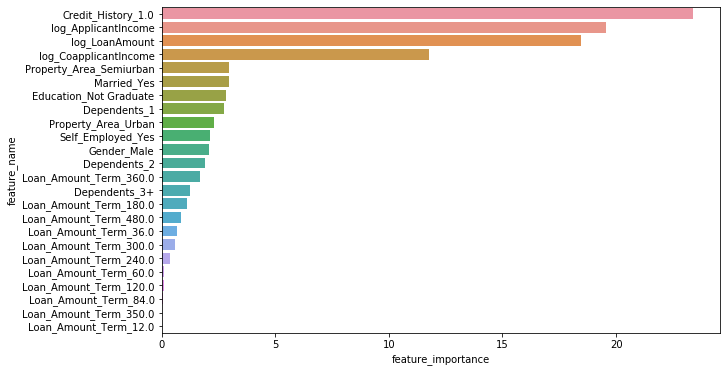

In [283]:
x=train_1.drop(['Loan_Status'], axis=1)
y=train_1[['Loan_Status']]

x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.7, random_state=100)

rc=RandomForestClassifier(n_estimators=1000, random_state=100)
rc.fit(x_train, y_train)
y=rc.feature_importances_

feature_importance={'feature_name':train_1.drop(['Loan_Status'], axis=1).columns.tolist(), 'feature_importance':y}

feature_imp_table_2=pd.DataFrame(feature_importance)
feature_imp_table_2['feature_importance']=feature_imp_table_2['feature_importance']*100
feature_imp_table_2.sort_values(['feature_importance'], ascending=False, inplace=True)

axes=plt.subplots(figsize=(10,6))
sns.barplot(x='feature_importance', y='feature_name', data=feature_imp_table_2)

In [295]:
col_1=['Credit_History_1.0','log_ApplicantIncome','log_LoanAmount','log_CoapplicantIncome']
col_2=['Credit_History_1.0','log_ApplicantIncome','log_LoanAmount','log_CoapplicantIncome', 'Married_Yes']
col_3=['Credit_History_1.0','log_ApplicantIncome','log_LoanAmount','log_CoapplicantIncome', 'Married_Yes', 'Property_Area_Semiurban']
col_4=['Credit_History_1.0','log_ApplicantIncome','log_LoanAmount','log_CoapplicantIncome', 'Married_Yes', 'Property_Area_Semiurban', 'Education_Not Graduate']
col_5=['Credit_History_1.0','log_ApplicantIncome','log_LoanAmount','log_CoapplicantIncome', 'Married_Yes', 'Property_Area_Semiurban', 'Education_Not Graduate','Dependents_1']
col_6=['Credit_History_1.0','log_ApplicantIncome','log_LoanAmount','log_CoapplicantIncome', 'Married_Yes', 'Property_Area_Semiurban', 'Education_Not Graduate','Dependents_1','Property_Area_Urban']
col_7=['Credit_History_1.0','log_ApplicantIncome','log_LoanAmount','log_CoapplicantIncome', 'Married_Yes', 'Property_Area_Semiurban', 'Education_Not Graduate','Dependents_1','Property_Area_Urban','Gender_Male']
col_8=['Credit_History_1.0','log_ApplicantIncome','log_LoanAmount','log_CoapplicantIncome', 'Married_Yes', 'Property_Area_Semiurban', 'Education_Not Graduate','Dependents_1','Property_Area_Urban','Gender_Male', 'Self_Employed_Yes']

x_col=[col_1, col_2, col_3, col_4, col_5, col_6, col_7, col_8]

In [296]:
for p in x_col:
    x=train_1[p]
    y=train_1[['Loan_Status']]
    x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.6, random_state=100)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    print('train = ', round(lr.score(x_train, y_train), 4), ', test = ', round(lr.score(x_test, y_test),4))
    print('================================================================================================')

train =  0.8152 , test =  0.7967
train =  0.8152 , test =  0.7967
train =  0.8152 , test =  0.7927
train =  0.8207 , test =  0.7927
train =  0.8207 , test =  0.7967
train =  0.8207 , test =  0.7927
train =  0.8207 , test =  0.7927
train =  0.8207 , test =  0.7927


In [308]:
x_train=train_1[col_1]
y_train=train_1[['Loan_Status']]
lr1=LogisticRegression()
lr1.fit(x_train, y_train)
print('train = ', round(lr1.score(x_train, y_train), 4))

train =  0.8078


In [313]:
x_test=test_1[col_1]
submit_21=pd.DataFrame()
submit_21['Loan_ID']=test['Loan_ID']
submit_21['Loan_Status']=lr1.predict(x_test)

submit_21['Loan_Status'].replace(1, 'Y', inplace=True)
submit_21['Loan_Status'].replace(0, 'N', inplace=True)

#submit_21.to_csv('submit_21.csv',index=False)

In [314]:
submit_21['Loan_Status'].value_counts()

1    306
0     61
Name: Loan_Status, dtype: int64

In [319]:
submit_21

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [322]:
score=pd.read_csv(r'E:\My Files\Downloads\69_865472_us_submit_1_B6lO2qo.csv')

In [326]:
score['pred_2']=submit_21['Loan_Status']

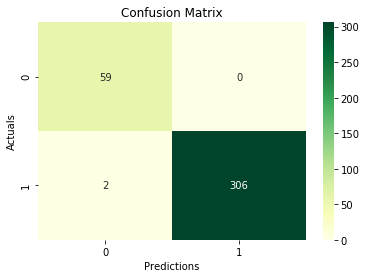

In [327]:
#confusion matrix on training dataset
con_matrix=confusion_matrix(score['Loan_Status'], score['pred_2'])
sns.heatmap(con_matrix, annot=True, cmap='YlGn', fmt='.3g')
plt.ylabel('Actuals')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

In [298]:
col1=[3,5,7,9,11,13,15,17]

for d in col1:
    for p in x_col:
        x=train_1[p]
        y=train_1[['Loan_Status']]
        x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.6, random_state=100)
        knn=KNeighborsClassifier(n_neighbors=d)
        knn.fit(x_train, y_train)
        print('Accuracy score')
        print(d, 'train = ', round(knn.score(x_train, y_train), 4), ', test = ', round(knn.score(x_test, y_test),4))
    print('================================================================================================')

Accuracy score
3 train =  0.8505 , test =  0.7805
Accuracy score
3 train =  0.8533 , test =  0.7561
Accuracy score
3 train =  0.8614 , test =  0.7398
Accuracy score
3 train =  0.875 , test =  0.7398
Accuracy score
3 train =  0.875 , test =  0.7439
Accuracy score
3 train =  0.8533 , test =  0.7033
Accuracy score
3 train =  0.8505 , test =  0.6992
Accuracy score
3 train =  0.8397 , test =  0.7073
Accuracy score
5 train =  0.8288 , test =  0.7886
Accuracy score
5 train =  0.837 , test =  0.7683
Accuracy score
5 train =  0.837 , test =  0.7764
Accuracy score
5 train =  0.8451 , test =  0.7683
Accuracy score
5 train =  0.8424 , test =  0.7398
Accuracy score
5 train =  0.8207 , test =  0.7398
Accuracy score
5 train =  0.8179 , test =  0.7276
Accuracy score
5 train =  0.8179 , test =  0.7276
Accuracy score
7 train =  0.8234 , test =  0.7886
Accuracy score
7 train =  0.8397 , test =  0.7846
Accuracy score
7 train =  0.8098 , test =  0.8008
Accuracy score
7 train =  0.8179 , test =  0.752
Accur

In [345]:
x_train=train_1[col_3]
y_train=train_1[['Loan_Status']]
knn1=KNeighborsClassifier(n_neighbors=9)
knn1.fit(x_train, y_train)
print('train = ', round(knn1.score(x_train, y_train), 4))

train =  0.8257


In [346]:
x_test=test_1[col_3]
submit_22=pd.DataFrame()
submit_22['Loan_ID']=test['Loan_ID']
submit_22['Loan_Status']=knn1.predict(x_test)

submit_22['Loan_Status'].replace(1, 'Y', inplace=True)
submit_22['Loan_Status'].replace(0, 'N', inplace=True)

#submit_21.to_csv('submit_21.csv',index=False)

In [347]:
submit_22['Loan_Status'].value_counts()

Y    302
N     65
Name: Loan_Status, dtype: int64

In [348]:
submit_22.to_csv('submit_23.csv',index=False)

In [299]:
col1=[1,2,3,4,5,6,7,8,9,10]

for d in col1:
    for p in x_col:
        x=train_1[p]
        y=train_1[['Loan_Status']]
        x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.6, random_state=100)
        dc=DecisionTreeClassifier(max_depth=d)
        dc.fit(x_train, y_train)
        print('Accuracy score')
        print(d,'train = ', round(dc.score(x_train, y_train), 4), ', test = ', round(dc.score(x_test, y_test),4))
    print('======================================================================================================')

Accuracy score
1 train =  0.8152 , test =  0.7967
Accuracy score
1 train =  0.8152 , test =  0.7967
Accuracy score
1 train =  0.8152 , test =  0.7967
Accuracy score
1 train =  0.8152 , test =  0.7967
Accuracy score
1 train =  0.8152 , test =  0.7967
Accuracy score
1 train =  0.8152 , test =  0.7967
Accuracy score
1 train =  0.8152 , test =  0.7967
Accuracy score
1 train =  0.8152 , test =  0.7967
Accuracy score
2 train =  0.8152 , test =  0.7967
Accuracy score
2 train =  0.8152 , test =  0.7967
Accuracy score
2 train =  0.8152 , test =  0.7967
Accuracy score
2 train =  0.8152 , test =  0.7967
Accuracy score
2 train =  0.8152 , test =  0.7967
Accuracy score
2 train =  0.8152 , test =  0.7967
Accuracy score
2 train =  0.8152 , test =  0.7967
Accuracy score
2 train =  0.8152 , test =  0.7967
Accuracy score
3 train =  0.8261 , test =  0.7642
Accuracy score
3 train =  0.8261 , test =  0.7683
Accuracy score
3 train =  0.8261 , test =  0.7683
Accuracy score
3 train =  0.8261 , test =  0.7683


In [354]:
x_train=train_1[col_2]
y_train=train_1[['Loan_Status']]
dc1=DecisionTreeClassifier(max_depth=2)
dc1.fit(x_train, y_train)
print('train = ', round(dc1.score(x_train, y_train), 4))

train =  0.8127


In [355]:
x_test=test_1[col_2]
submit_24=pd.DataFrame()
submit_24['Loan_ID']=test['Loan_ID']
submit_24['Loan_Status']=dc1.predict(x_test)

submit_24['Loan_Status'].replace(1, 'Y', inplace=True)
submit_24['Loan_Status'].replace(0, 'N', inplace=True)

#submit_21.to_csv('submit_21.csv',index=False)

In [357]:
submit_24['Loan_Status'].value_counts()

Y    302
N     65
Name: Loan_Status, dtype: int64

In [358]:
submit_24.to_csv('submit_24.csv',index=False)

In [301]:
col1=[1,2,3,4,5,6,7,8,9,10]

for d in col1:
    for p in x_col:
        x=train_1[p]
        y=train_1[['Loan_Status']]
        x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.6, random_state=100)
        rc=RandomForestClassifier(n_estimators=1000, max_depth=d, random_state=100)
        rc.fit(x_train, y_train)
        print('Accuracy score')
        print(d, 'train = ', round(rc.score(x_train, y_train), 4), ', test = ', round(rc.score(x_test, y_test),4))
    print('=======================================================================================================')

Accuracy score
1 train =  0.8152 , test =  0.7967
Accuracy score
1 train =  0.8152 , test =  0.7967
Accuracy score
1 train =  0.8043 , test =  0.7642
Accuracy score
1 train =  0.7011 , test =  0.6911
Accuracy score
1 train =  0.6929 , test =  0.6789
Accuracy score
1 train =  0.8016 , test =  0.7561
Accuracy score
1 train =  0.7337 , test =  0.6992
Accuracy score
1 train =  0.7147 , test =  0.6951
Accuracy score
2 train =  0.8152 , test =  0.7967
Accuracy score
2 train =  0.8152 , test =  0.7967
Accuracy score
2 train =  0.8152 , test =  0.7967
Accuracy score
2 train =  0.8152 , test =  0.7967
Accuracy score
2 train =  0.8152 , test =  0.7967
Accuracy score
2 train =  0.8152 , test =  0.7967
Accuracy score
2 train =  0.8152 , test =  0.7967
Accuracy score
2 train =  0.8152 , test =  0.7967
Accuracy score
3 train =  0.8179 , test =  0.7967
Accuracy score
3 train =  0.8179 , test =  0.7967
Accuracy score
3 train =  0.8179 , test =  0.7967
Accuracy score
3 train =  0.8152 , test =  0.7967


In [359]:
x_train=train_1[col_2]
y_train=train_1[['Loan_Status']]
rc1=RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=100)
rc1.fit(x_train, y_train)
print('train = ', round(rc1.score(x_train, y_train), 4))

train =  0.8208


In [364]:
x_test=test_1[col_2]
submit25=pd.DataFrame()
submit25['Loan_ID']=test['Loan_ID']
submit25['Loan_Status']=rc1.predict(x_test)

In [365]:
submit25['Loan_Status'].value_counts()

1    305
0     62
Name: Loan_Status, dtype: int64

In [367]:
submit25['Loan_Status'].replace(1, 'Y', inplace=True)
submit25['Loan_Status'].replace(0, 'N', inplace=True)

In [368]:
submit25.to_csv('submit_25.csv',index=False)